In [13]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm
import random
import pickle
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import Normalizer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# for ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [14]:
df = pd.read_csv('Dataset\df.csv')
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,sum,class_prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Fungal infection,4,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Fungal infection,3,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Fungal infection,3,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Fungal infection,3,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Fungal infection,3,15


In [15]:
df.shape

(4920, 135)

In [16]:
# creating instance of labelencoder
le = LabelEncoder()
# Assigning numerical values and storing in another column
df['class_prognosis'] = le.fit_transform(df['prognosis'])
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,sum,class_prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Fungal infection,4,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Fungal infection,3,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Fungal infection,3,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Fungal infection,3,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Fungal infection,3,15


In [17]:
#print(sorted(list(df['class_prognosis'].unique())))

In [18]:
#df['class_prognosis'].value_counts()

In [19]:
# Drop unwanted columns
df = df.drop(['prognosis','sum'], axis=1)

In [20]:
# Split data
X, Y = df.iloc[:,:-1], df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42, stratify = Y)

In [21]:
# Model initialization
lr_Classifier = LogisticRegression()
knn_Classifier = KNeighborsClassifier()
gnb_Classifier = GaussianNB()
dt_Classifier = DecisionTreeClassifier()
rf_Classifier = RandomForestClassifier()
model_list = [lr_Classifier, knn_Classifier, gnb_Classifier, dt_Classifier, rf_Classifier]

# Scaler initialization
MinMax_scaler = MinMaxScaler()
Standard_scaler = StandardScaler()
MaxAbs_scaler = MaxAbsScaler()
Robust_scaler = RobustScaler()
Quantile_scaler = QuantileTransformer()
Power_scaler = PowerTransformer()
Normalizer_scaler = Normalizer()
scaler_list = [MinMax_scaler, Standard_scaler, MaxAbs_scaler, Robust_scaler, 
               Quantile_scaler, Power_scaler, Normalizer_scaler]

In [22]:
def run_pipeline(X_train, X_test, y_train, y_test, scaler, classifier):
    # Model Information
    print(f"Modele name : {type(classifier).__name__}")
    print(f"Scaler name : {type(scaler).__name__}")
    
    # process 1 : fit and transform X_train data
    scaled_X_train = scaler.fit_transform(X_train)
    
    # process 2 : train model
    classifier.fit(scaled_X_train, y_train)  
    
    # process 3 : transform X_test data
    scaled_X_test = scaler.transform(X_test)
    
    # process 4 : test model
    y_pred = classifier.predict(scaled_X_test)
    # print(y_pred, le.inverse_transform(y_pred))
    
    # process 5 : model evalution
    print("Accuracy_score:", round((accuracy_score(y_test, y_pred))*100,2),'%')
    print("Loss:", round((1-accuracy_score(y_test, y_pred))*100,2),'%')
    print("Cohen_kappa_score:", round((cohen_kappa_score(y_test, y_pred))*100,2),'%')
    print("Classification_report:\n",metrics.classification_report(y_test, y_pred))
    print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))
    # plot confusion_matrix
    fig, ax = plt.subplots()
    fig.set_size_inches(12,8) # WH
    sns.heatmap(confusion_matrix(y_test, y_pred), 
                annot=True,
                linewidths = 2,
                linecolor = "blue",
                center=0)
    plt.show()
    
    # process 6 : save model in pkl file
    filename = 'Moduls\\'+str(type(classifier).__name__)+'_Symtoms.pkl'
    pickle.dump(classifier, open(filename, 'wb'))
    
    # end 
    print("==="*30)
    print("\n\n")
    time.sleep(3)

Modele name : LogisticRegression
Scaler name : MinMaxScaler
Accuracy_score: 100.0 %
Loss: 0.0 %
Cohen_kappa_score: 100.0 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        36
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        36
          11       1.00      1.00      1.00        36
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        36
          14       1.00      1.00      1.0

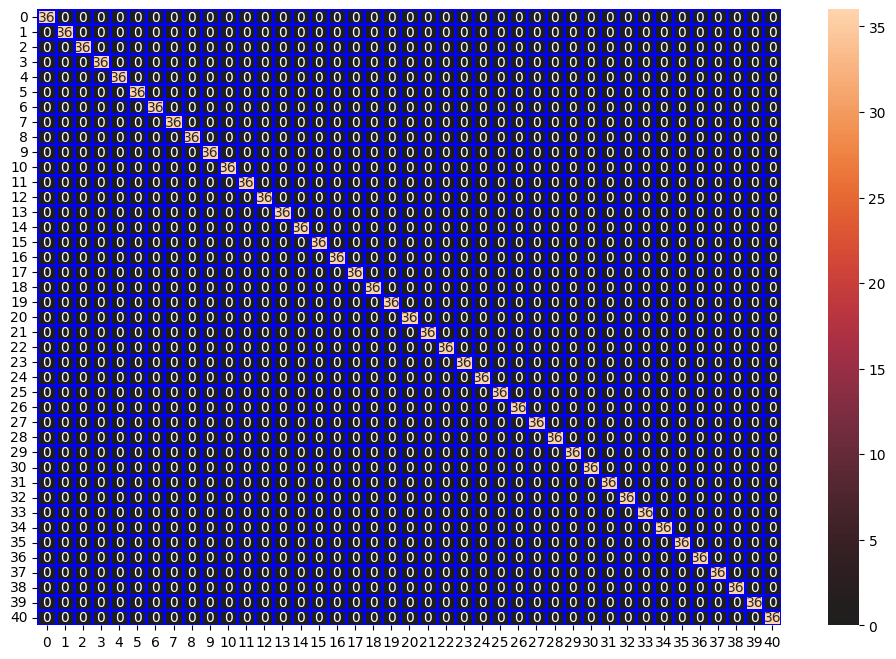




Modele name : LogisticRegression
Scaler name : StandardScaler
Accuracy_score: 100.0 %
Loss: 0.0 %
Cohen_kappa_score: 100.0 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        36
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        36
          11       1.00      1.00      1.00        36
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        36
          14       1.00      1.00    

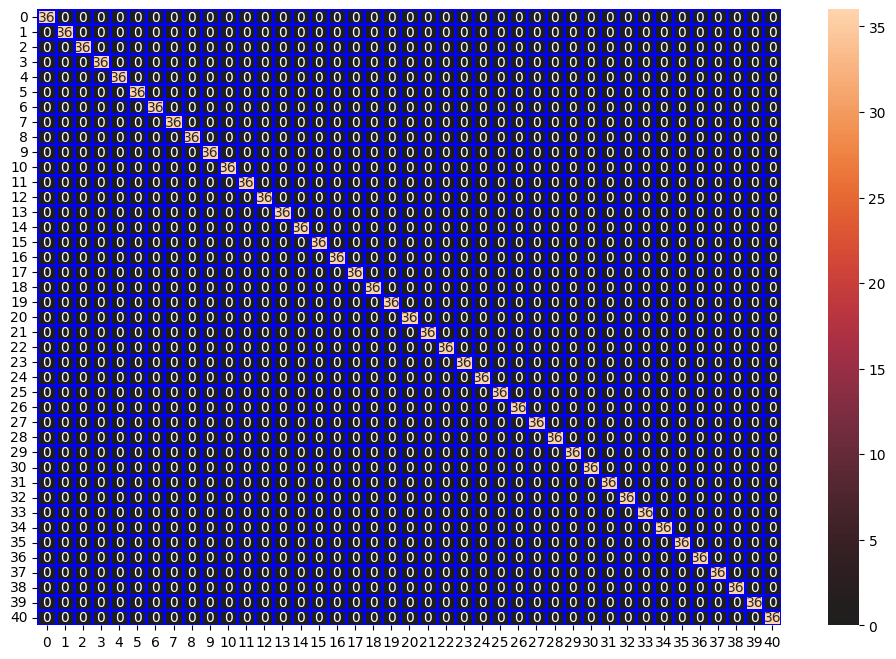




Modele name : LogisticRegression
Scaler name : MaxAbsScaler
Accuracy_score: 100.0 %
Loss: 0.0 %
Cohen_kappa_score: 100.0 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        36
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        36
          11       1.00      1.00      1.00        36
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        36
          14       1.00      1.00      

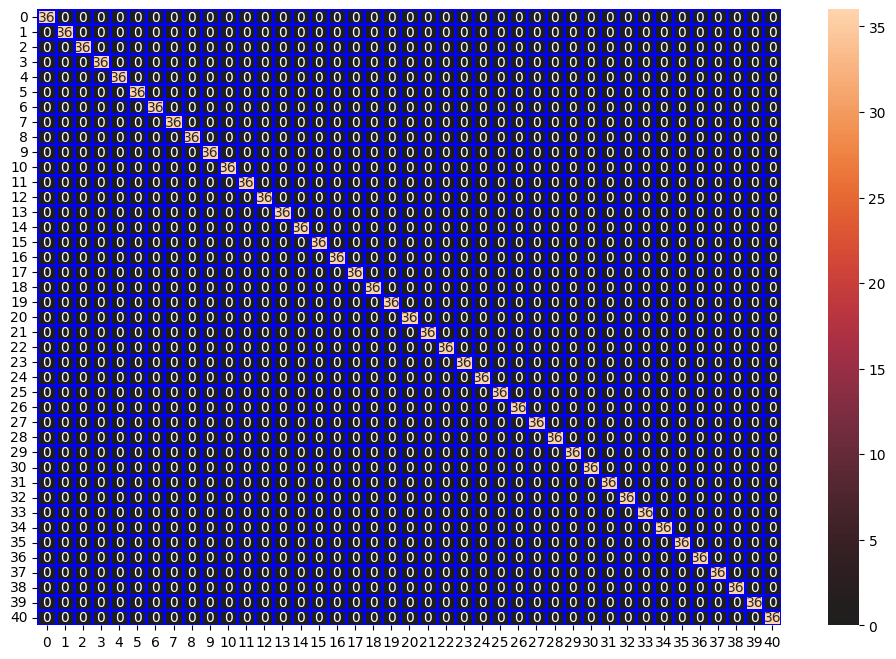




Modele name : LogisticRegression
Scaler name : RobustScaler
Accuracy_score: 100.0 %
Loss: 0.0 %
Cohen_kappa_score: 100.0 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        36
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        36
          11       1.00      1.00      1.00        36
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        36
          14       1.00      1.00      

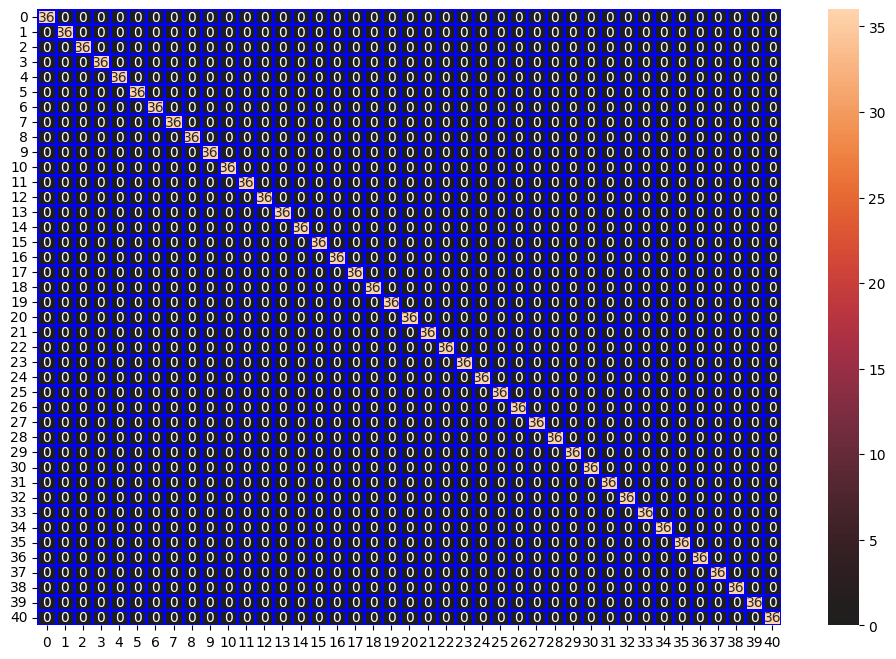




Modele name : LogisticRegression
Scaler name : QuantileTransformer
Accuracy_score: 100.0 %
Loss: 0.0 %
Cohen_kappa_score: 100.0 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        36
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        36
          11       1.00      1.00      1.00        36
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        36
          14       1.00      1.0

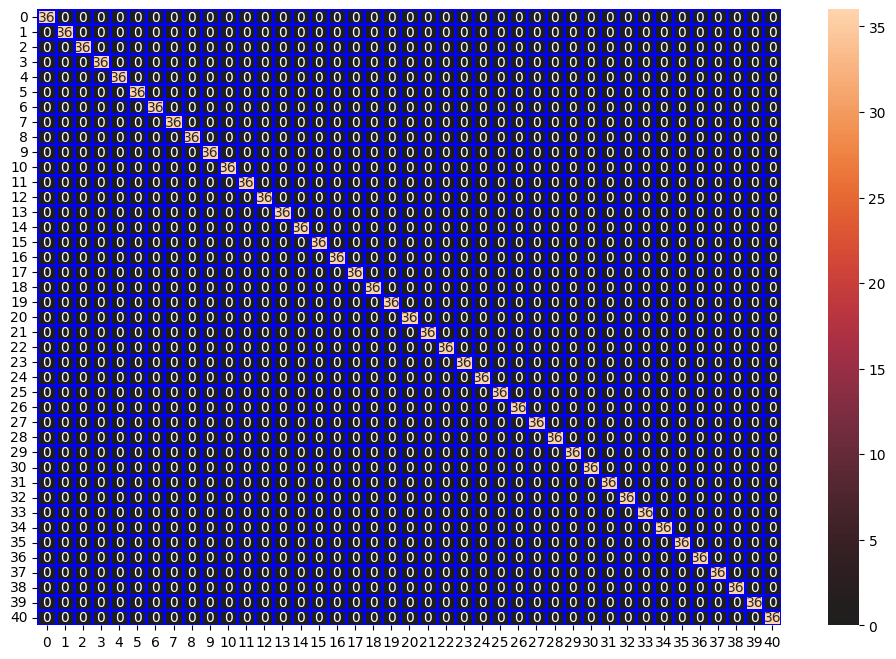




Modele name : LogisticRegression
Scaler name : PowerTransformer
Accuracy_score: 100.0 %
Loss: 0.0 %
Cohen_kappa_score: 100.0 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        36
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        36
          11       1.00      1.00      1.00        36
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        36
          14       1.00      1.00  

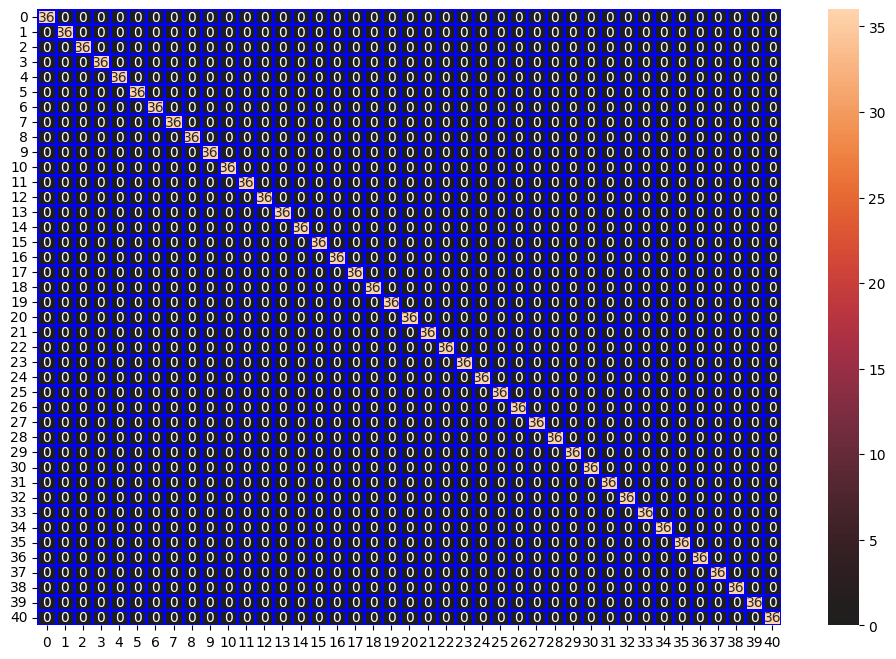




Modele name : LogisticRegression
Scaler name : Normalizer
Accuracy_score: 100.0 %
Loss: 0.0 %
Cohen_kappa_score: 100.0 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        36
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        36
          11       1.00      1.00      1.00        36
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        36
          14       1.00      1.00      1.

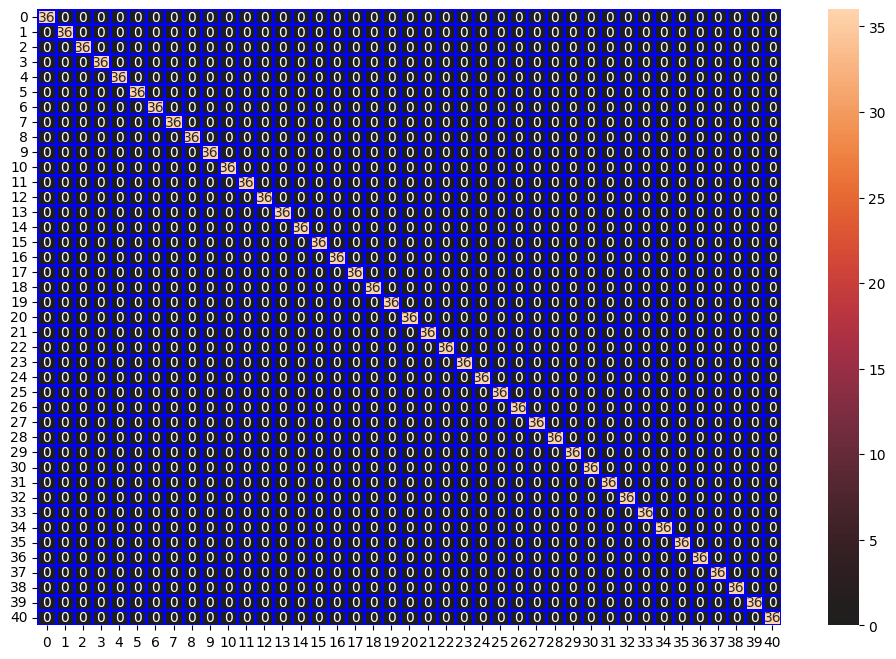




Modele name : KNeighborsClassifier
Scaler name : MinMaxScaler
Accuracy_score: 100.0 %
Loss: 0.0 %
Cohen_kappa_score: 100.0 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        36
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        36
          11       1.00      1.00      1.00        36
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        36
          14       1.00      1.00    

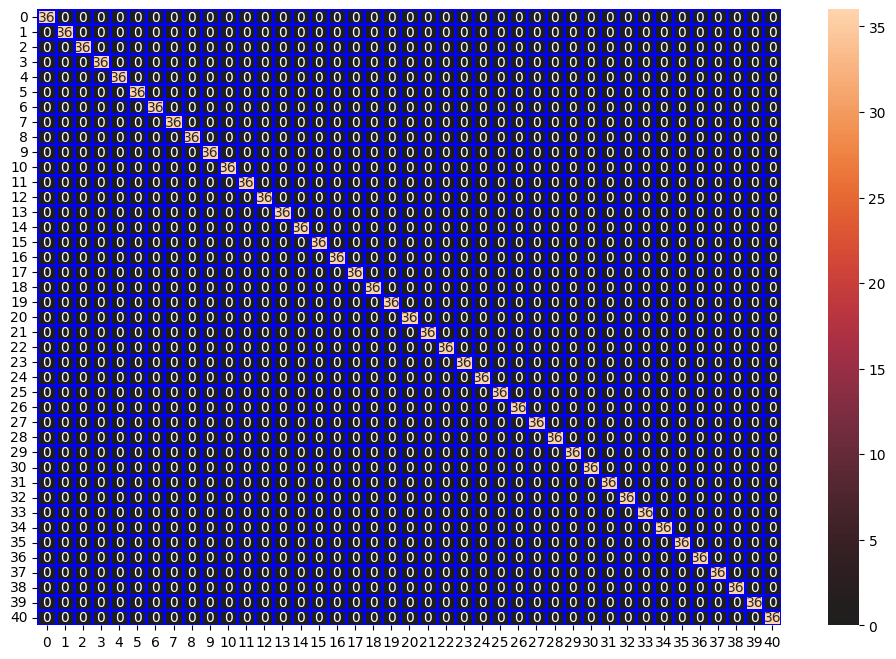




Modele name : KNeighborsClassifier
Scaler name : StandardScaler
Accuracy_score: 100.0 %
Loss: 0.0 %
Cohen_kappa_score: 100.0 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        36
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        36
          11       1.00      1.00      1.00        36
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        36
          14       1.00      1.00  

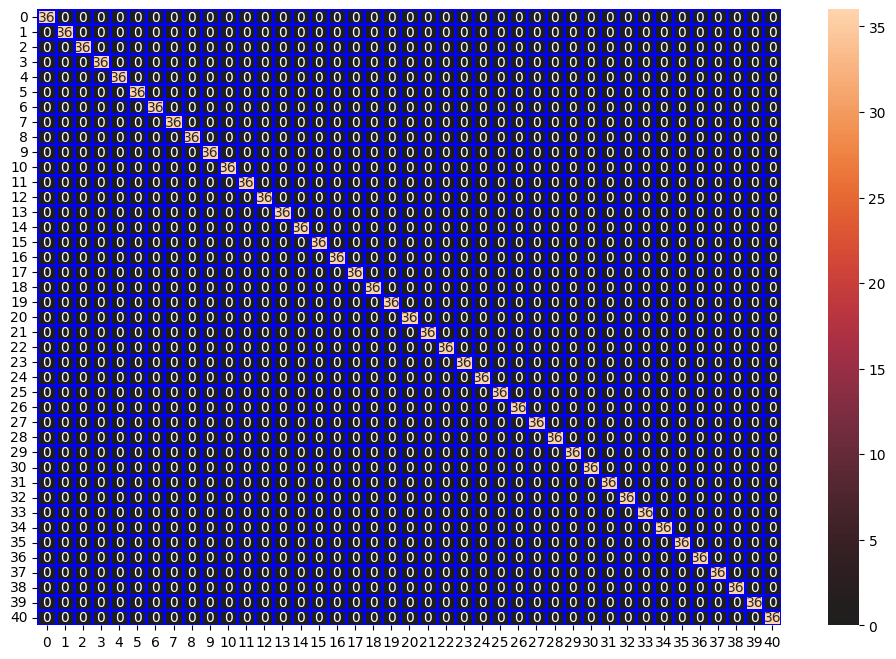




Modele name : KNeighborsClassifier
Scaler name : MaxAbsScaler
Accuracy_score: 100.0 %
Loss: 0.0 %
Cohen_kappa_score: 100.0 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        36
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        36
          11       1.00      1.00      1.00        36
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        36
          14       1.00      1.00    

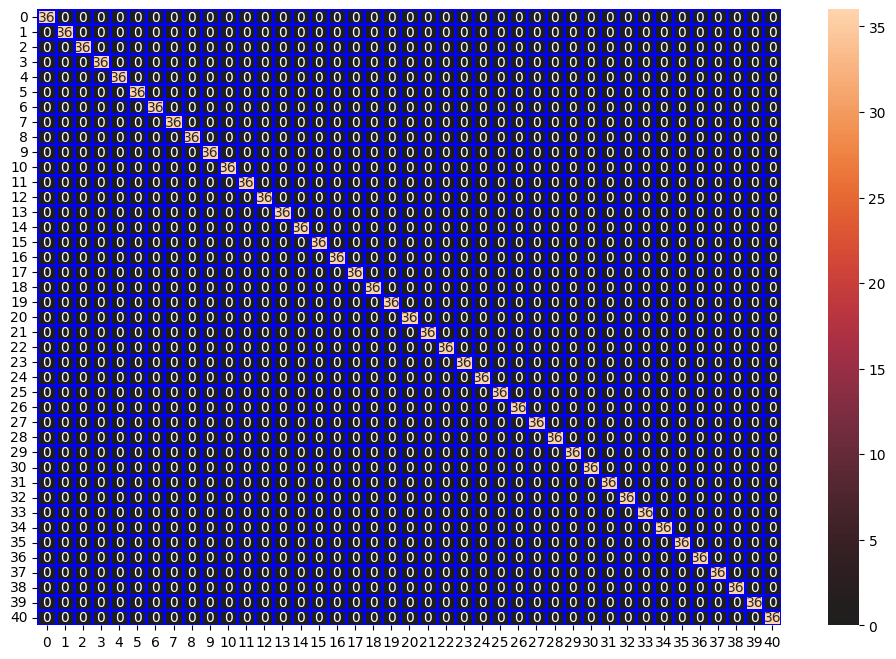




Modele name : KNeighborsClassifier
Scaler name : RobustScaler
Accuracy_score: 100.0 %
Loss: 0.0 %
Cohen_kappa_score: 100.0 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        36
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        36
          11       1.00      1.00      1.00        36
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        36
          14       1.00      1.00    

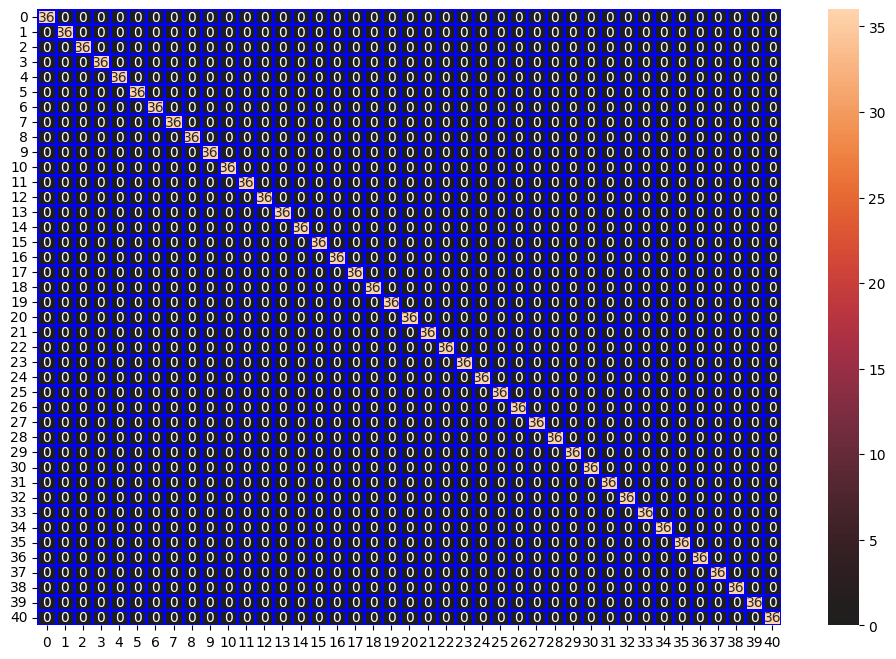




Modele name : KNeighborsClassifier
Scaler name : QuantileTransformer
Accuracy_score: 100.0 %
Loss: 0.0 %
Cohen_kappa_score: 100.0 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        36
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        36
          11       1.00      1.00      1.00        36
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        36
          14       1.00      1

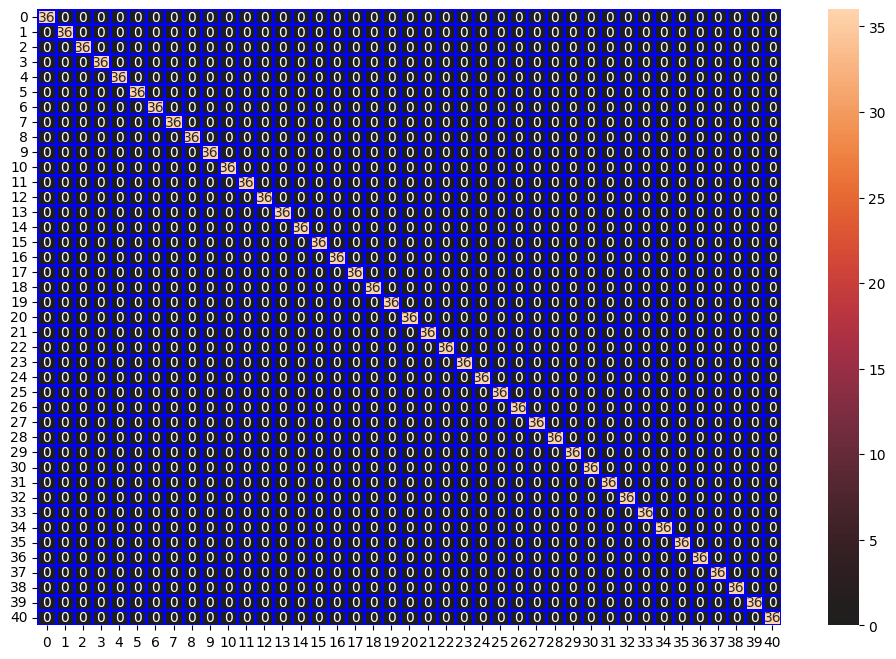




Modele name : KNeighborsClassifier
Scaler name : PowerTransformer
Accuracy_score: 100.0 %
Loss: 0.0 %
Cohen_kappa_score: 100.0 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        36
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        36
          11       1.00      1.00      1.00        36
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        36
          14       1.00      1.00

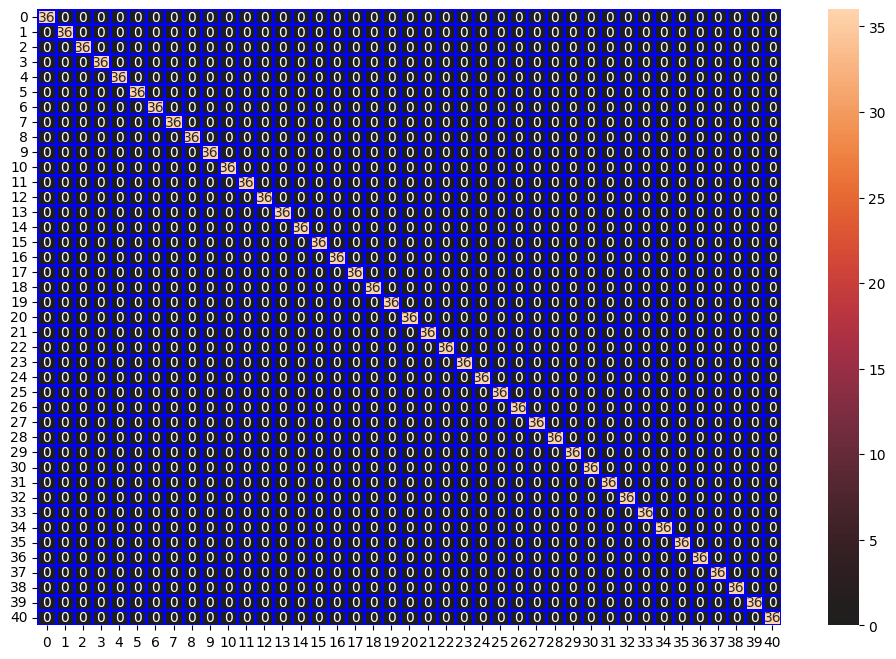




Modele name : KNeighborsClassifier
Scaler name : Normalizer
Accuracy_score: 100.0 %
Loss: 0.0 %
Cohen_kappa_score: 100.0 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        36
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        36
          11       1.00      1.00      1.00        36
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        36
          14       1.00      1.00      

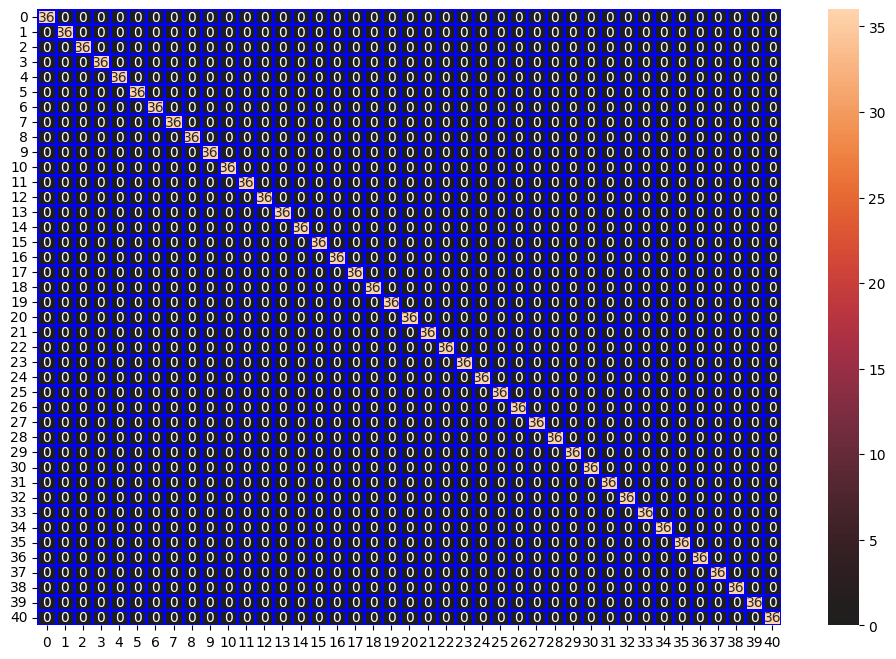




Modele name : GaussianNB
Scaler name : MinMaxScaler
Accuracy_score: 100.0 %
Loss: 0.0 %
Cohen_kappa_score: 100.0 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        36
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        36
          11       1.00      1.00      1.00        36
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        36
          14       1.00      1.00      1.00    

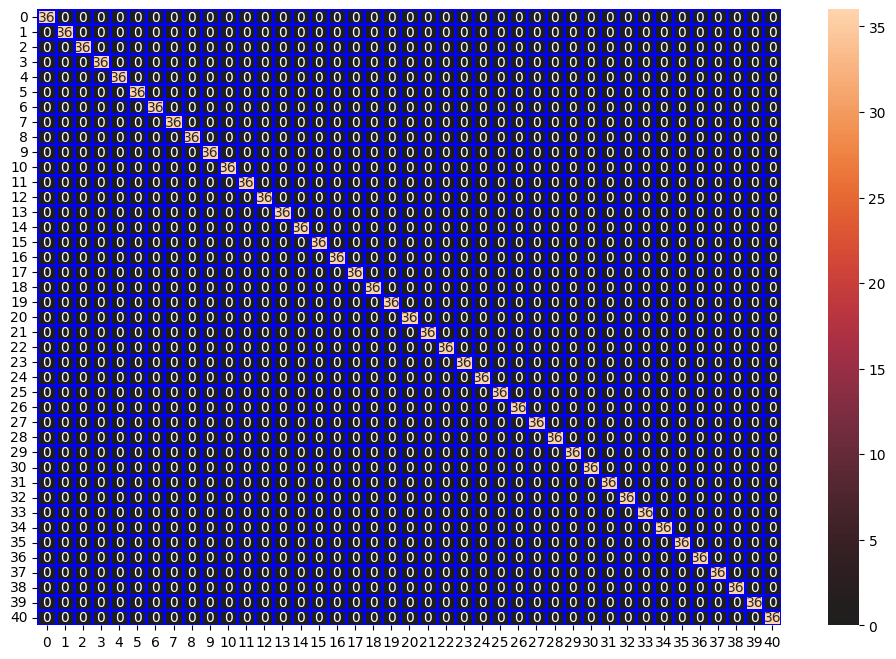




Modele name : GaussianNB
Scaler name : StandardScaler
Accuracy_score: 100.0 %
Loss: 0.0 %
Cohen_kappa_score: 100.0 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        36
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        36
          11       1.00      1.00      1.00        36
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        36
          14       1.00      1.00      1.00  

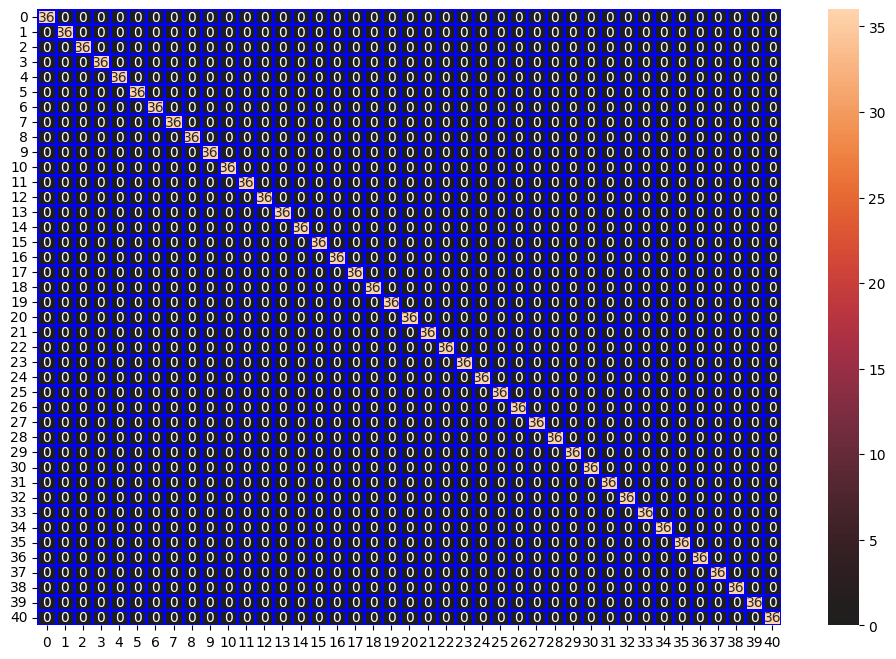




Modele name : GaussianNB
Scaler name : MaxAbsScaler
Accuracy_score: 100.0 %
Loss: 0.0 %
Cohen_kappa_score: 100.0 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        36
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        36
          11       1.00      1.00      1.00        36
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        36
          14       1.00      1.00      1.00    

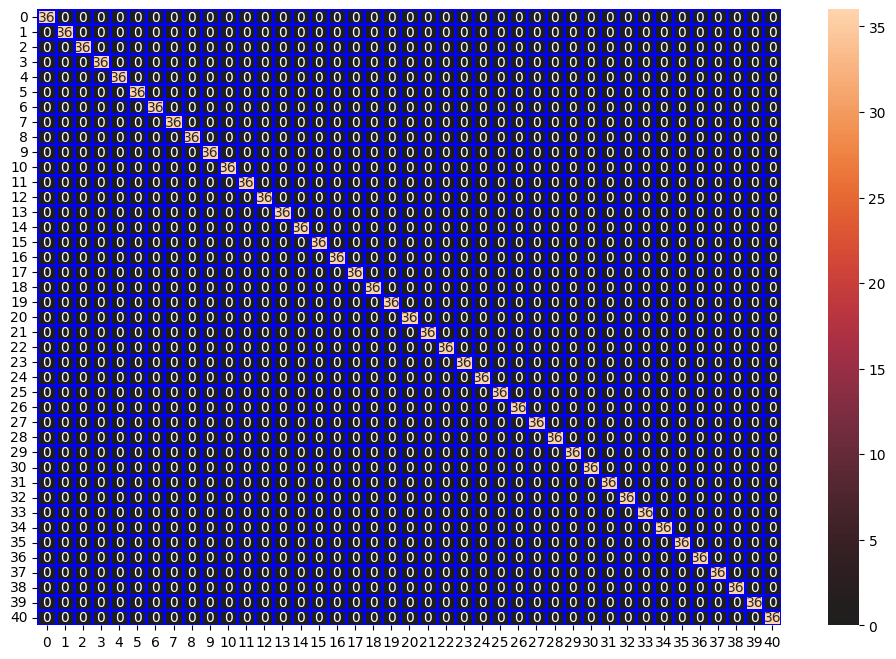




Modele name : GaussianNB
Scaler name : RobustScaler
Accuracy_score: 100.0 %
Loss: 0.0 %
Cohen_kappa_score: 100.0 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        36
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        36
          11       1.00      1.00      1.00        36
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        36
          14       1.00      1.00      1.00    

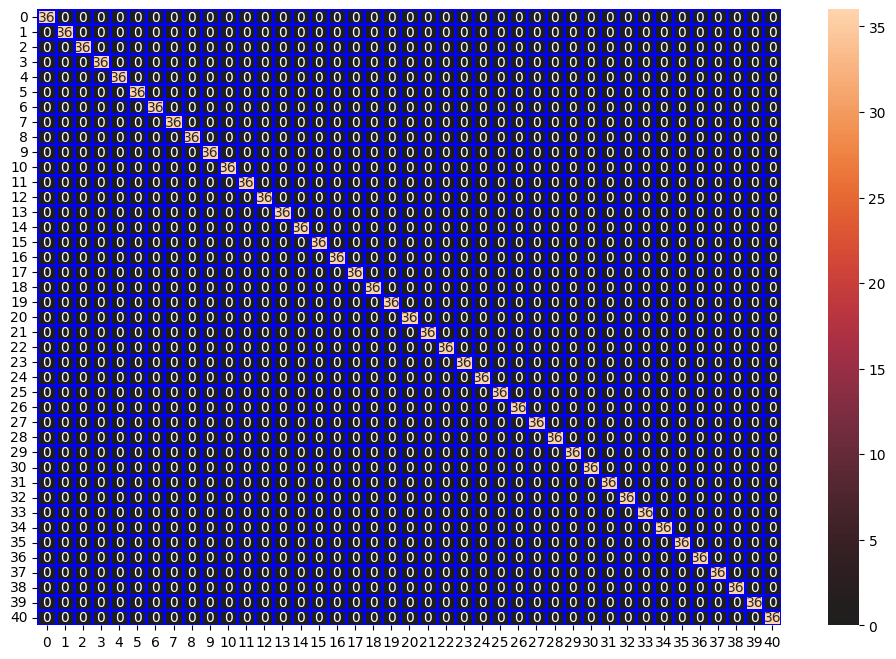




Modele name : GaussianNB
Scaler name : QuantileTransformer
Accuracy_score: 100.0 %
Loss: 0.0 %
Cohen_kappa_score: 100.0 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        36
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        36
          11       1.00      1.00      1.00        36
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        36
          14       1.00      1.00      1

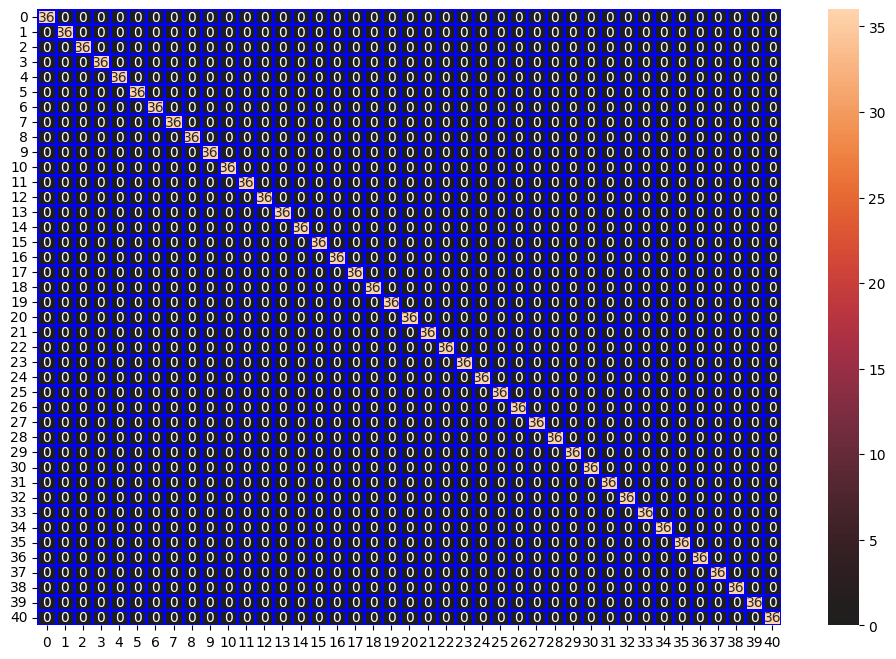




Modele name : GaussianNB
Scaler name : PowerTransformer
Accuracy_score: 100.0 %
Loss: 0.0 %
Cohen_kappa_score: 100.0 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        36
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        36
          11       1.00      1.00      1.00        36
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        36
          14       1.00      1.00      1.00

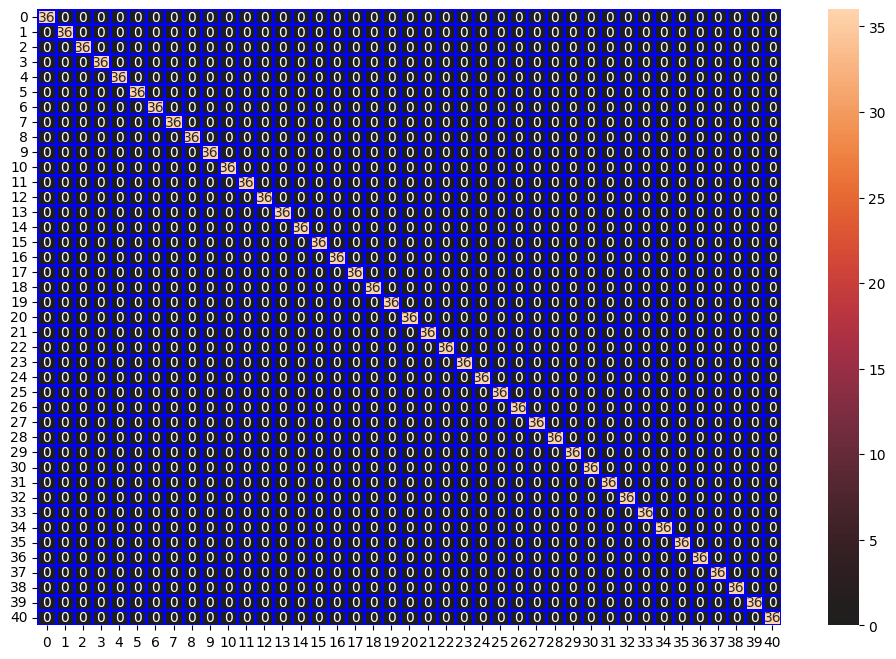




Modele name : GaussianNB
Scaler name : Normalizer
Accuracy_score: 100.0 %
Loss: 0.0 %
Cohen_kappa_score: 100.0 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        36
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        36
          11       1.00      1.00      1.00        36
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        36
          14       1.00      1.00      1.00      

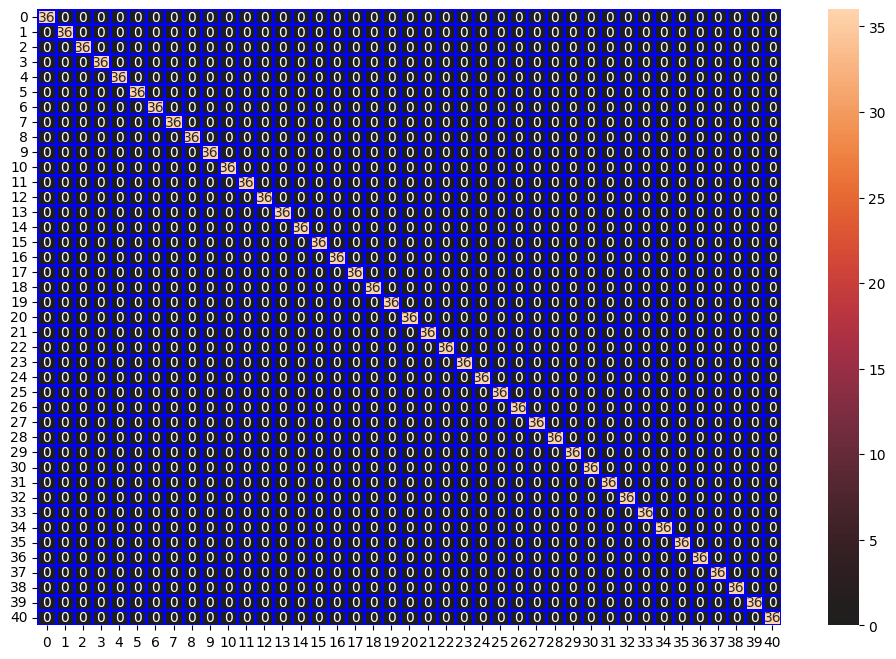




Modele name : DecisionTreeClassifier
Scaler name : MinMaxScaler
Accuracy_score: 100.0 %
Loss: 0.0 %
Cohen_kappa_score: 100.0 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        36
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        36
          11       1.00      1.00      1.00        36
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        36
          14       1.00      1.00  

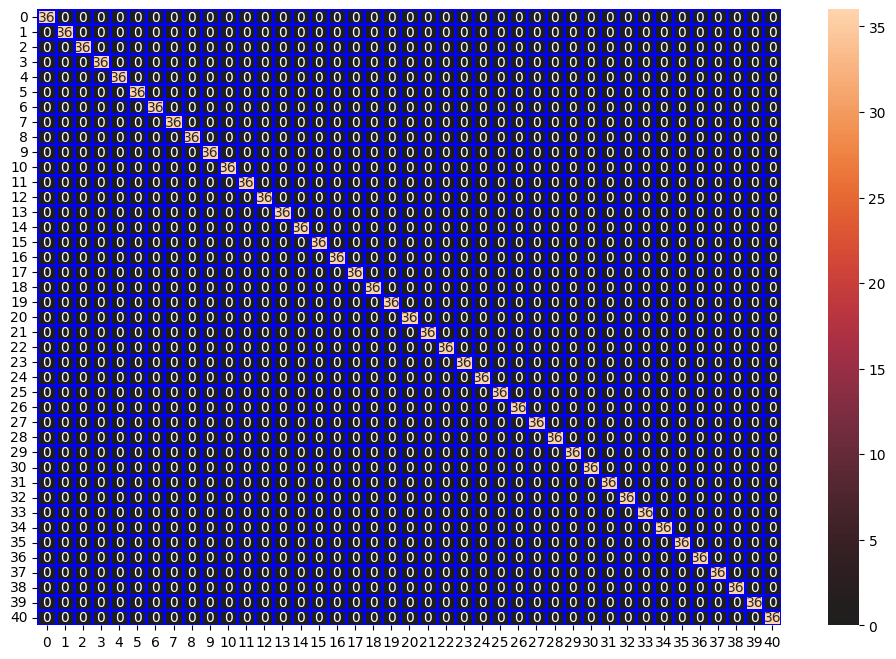




Modele name : DecisionTreeClassifier
Scaler name : StandardScaler
Accuracy_score: 100.0 %
Loss: 0.0 %
Cohen_kappa_score: 100.0 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        36
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        36
          11       1.00      1.00      1.00        36
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        36
          14       1.00      1.00

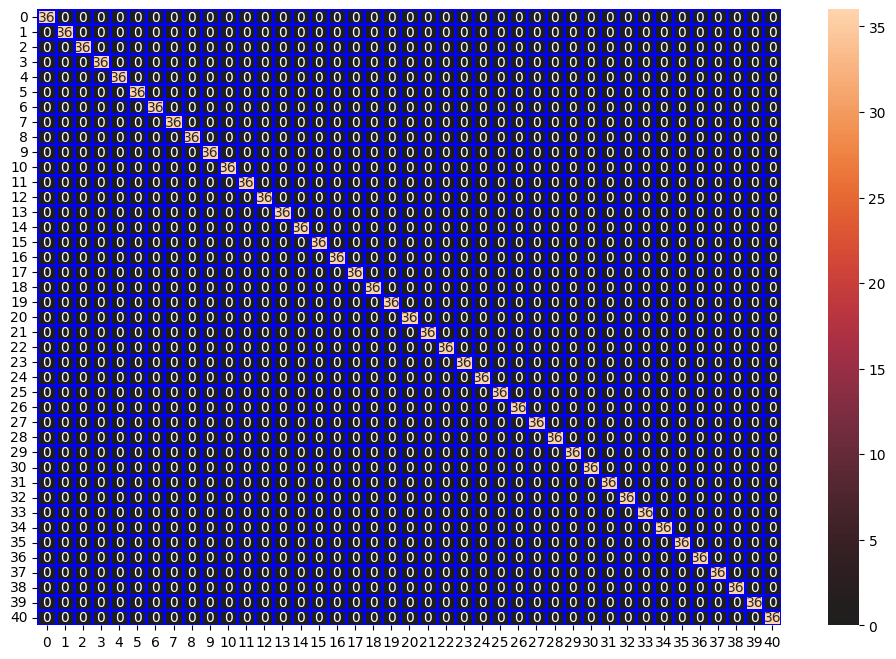




Modele name : DecisionTreeClassifier
Scaler name : MaxAbsScaler
Accuracy_score: 100.0 %
Loss: 0.0 %
Cohen_kappa_score: 100.0 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        36
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        36
          11       1.00      1.00      1.00        36
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        36
          14       1.00      1.00  

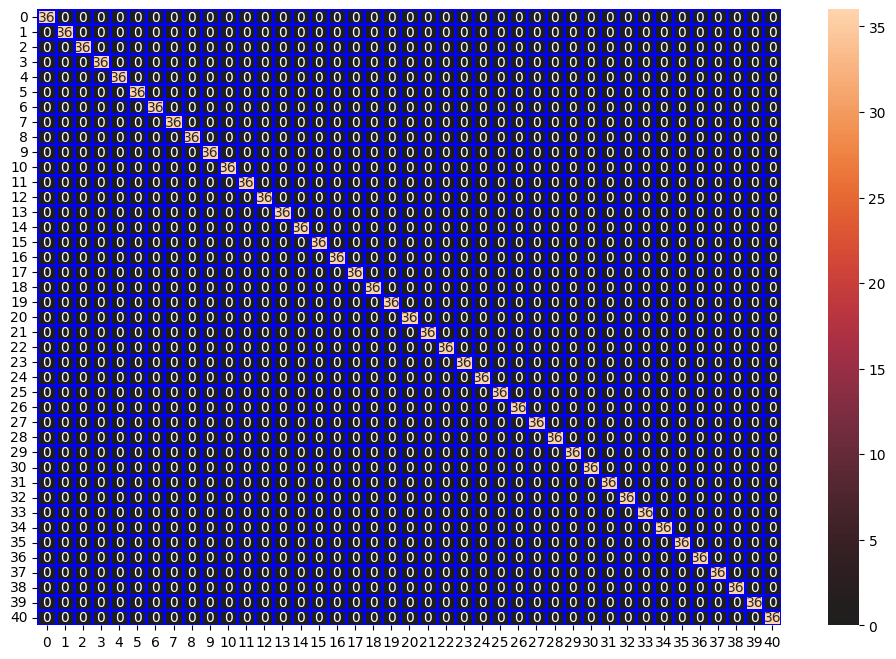




Modele name : DecisionTreeClassifier
Scaler name : RobustScaler
Accuracy_score: 100.0 %
Loss: 0.0 %
Cohen_kappa_score: 100.0 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        36
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        36
          11       1.00      1.00      1.00        36
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        36
          14       1.00      1.00  

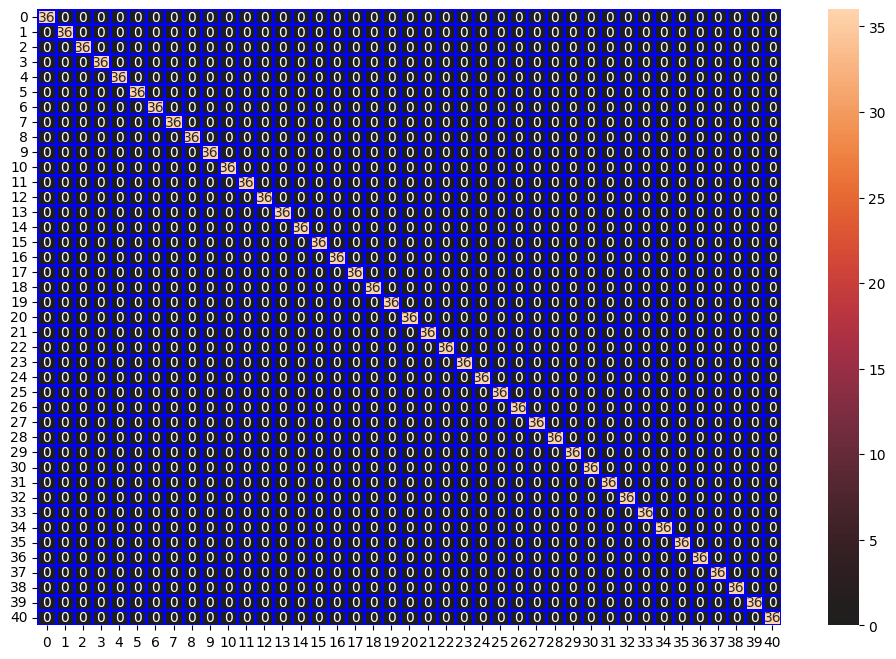




Modele name : DecisionTreeClassifier
Scaler name : QuantileTransformer
Accuracy_score: 100.0 %
Loss: 0.0 %
Cohen_kappa_score: 100.0 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        36
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        36
          11       1.00      1.00      1.00        36
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        36
          14       1.00     

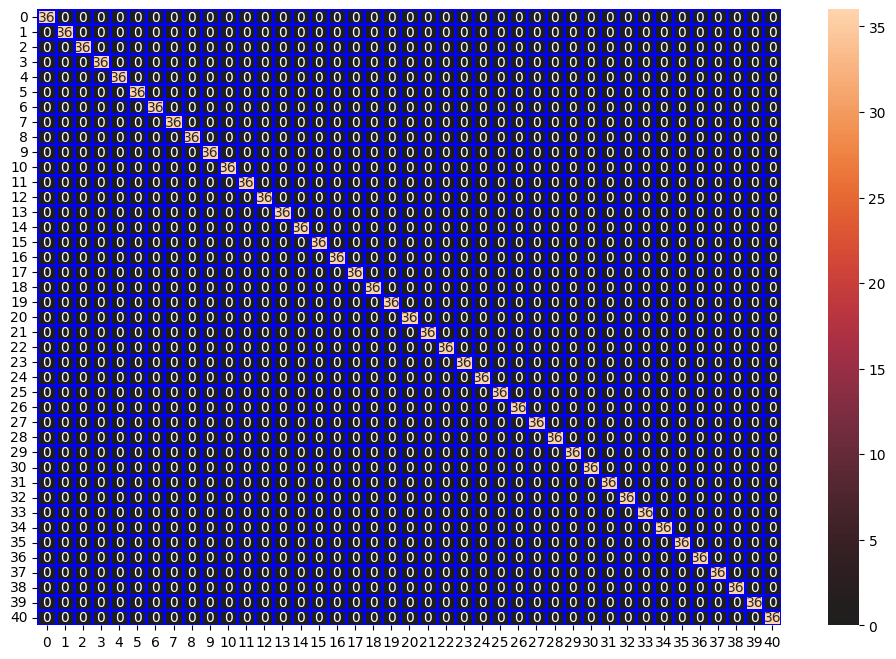




Modele name : DecisionTreeClassifier
Scaler name : PowerTransformer
Accuracy_score: 100.0 %
Loss: 0.0 %
Cohen_kappa_score: 100.0 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        36
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        36
          11       1.00      1.00      1.00        36
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        36
          14       1.00      1.

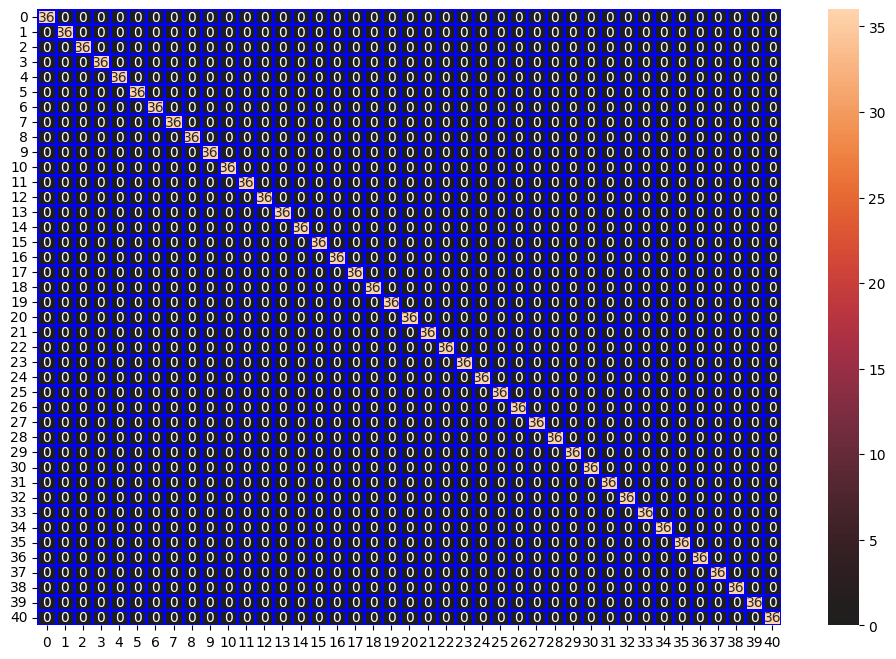




Modele name : DecisionTreeClassifier
Scaler name : Normalizer
Accuracy_score: 100.0 %
Loss: 0.0 %
Cohen_kappa_score: 100.0 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        36
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        36
          11       1.00      1.00      1.00        36
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        36
          14       1.00      1.00    

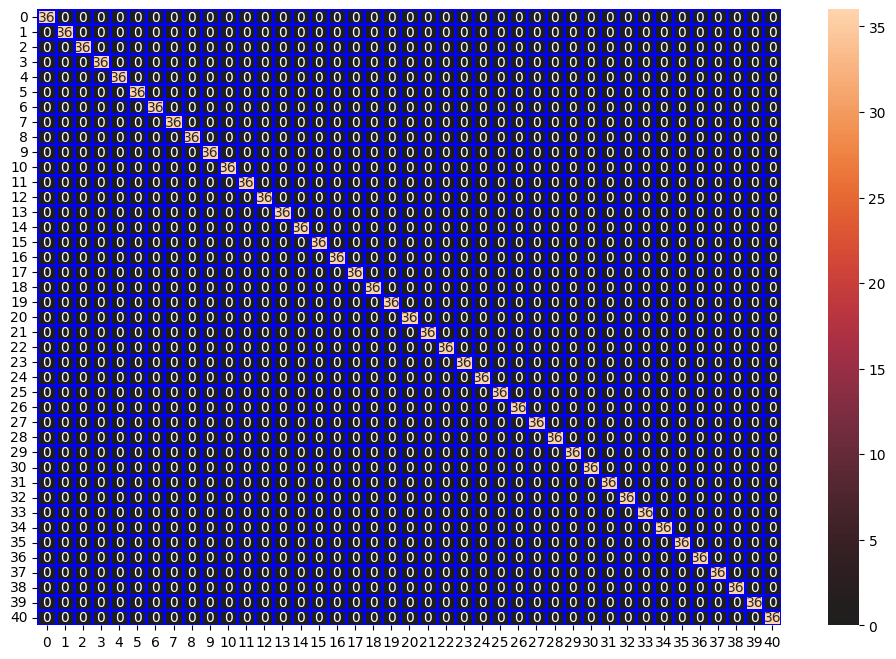




Modele name : RandomForestClassifier
Scaler name : MinMaxScaler
Accuracy_score: 100.0 %
Loss: 0.0 %
Cohen_kappa_score: 100.0 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        36
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        36
          11       1.00      1.00      1.00        36
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        36
          14       1.00      1.00  

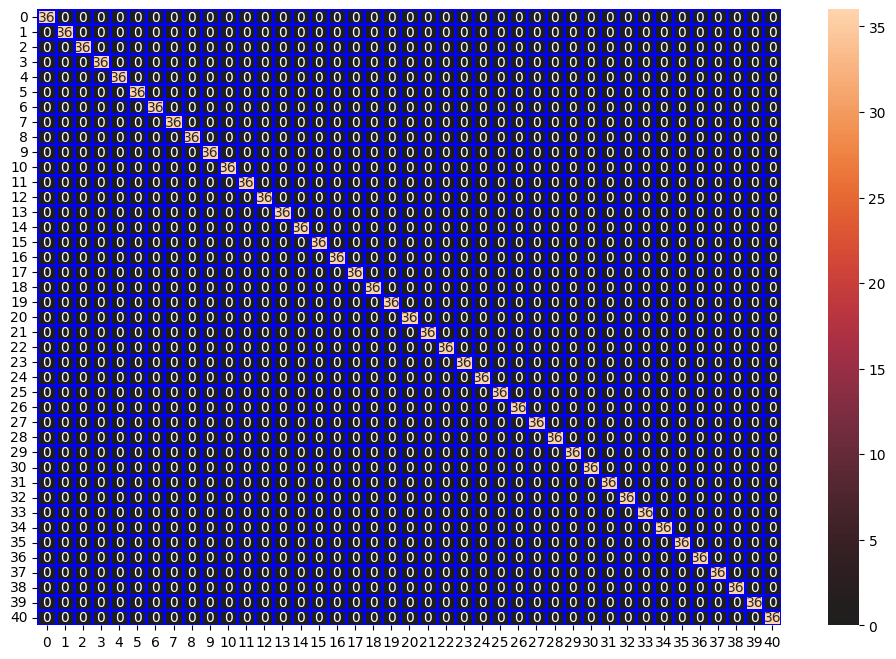




Modele name : RandomForestClassifier
Scaler name : StandardScaler
Accuracy_score: 100.0 %
Loss: 0.0 %
Cohen_kappa_score: 100.0 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        36
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        36
          11       1.00      1.00      1.00        36
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        36
          14       1.00      1.00

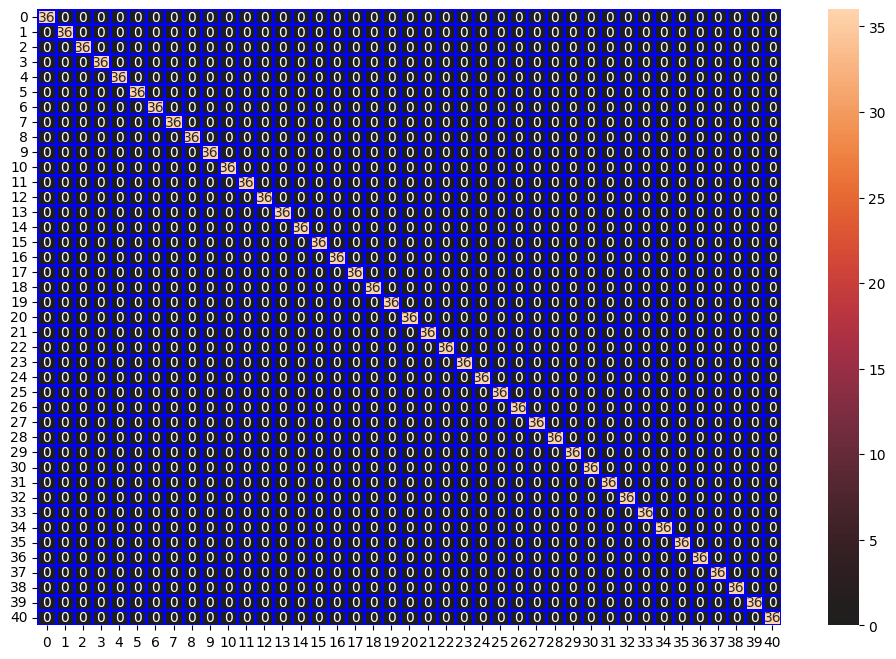




Modele name : RandomForestClassifier
Scaler name : MaxAbsScaler
Accuracy_score: 100.0 %
Loss: 0.0 %
Cohen_kappa_score: 100.0 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        36
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        36
          11       1.00      1.00      1.00        36
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        36
          14       1.00      1.00  

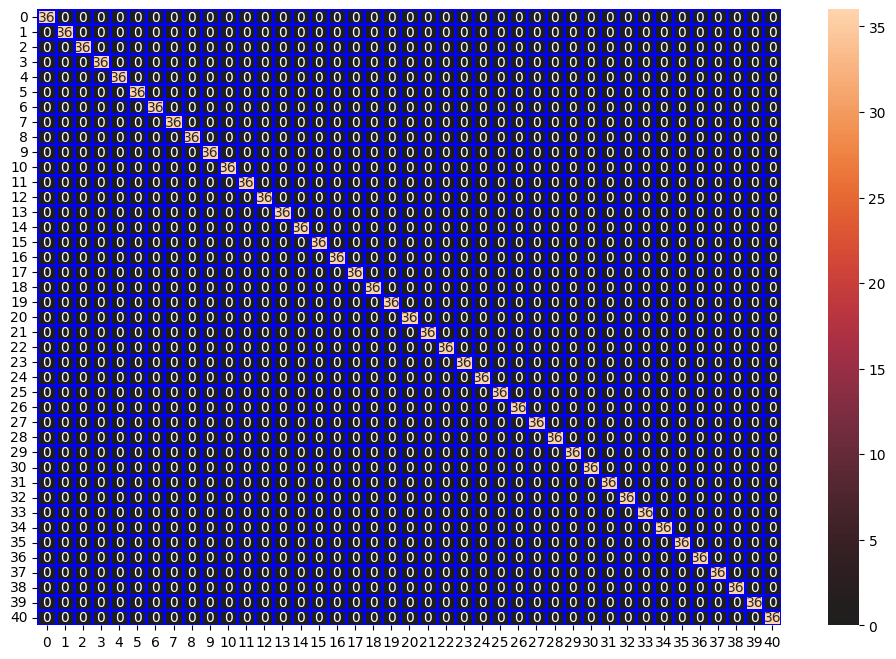




Modele name : RandomForestClassifier
Scaler name : RobustScaler
Accuracy_score: 100.0 %
Loss: 0.0 %
Cohen_kappa_score: 100.0 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        36
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        36
          11       1.00      1.00      1.00        36
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        36
          14       1.00      1.00  

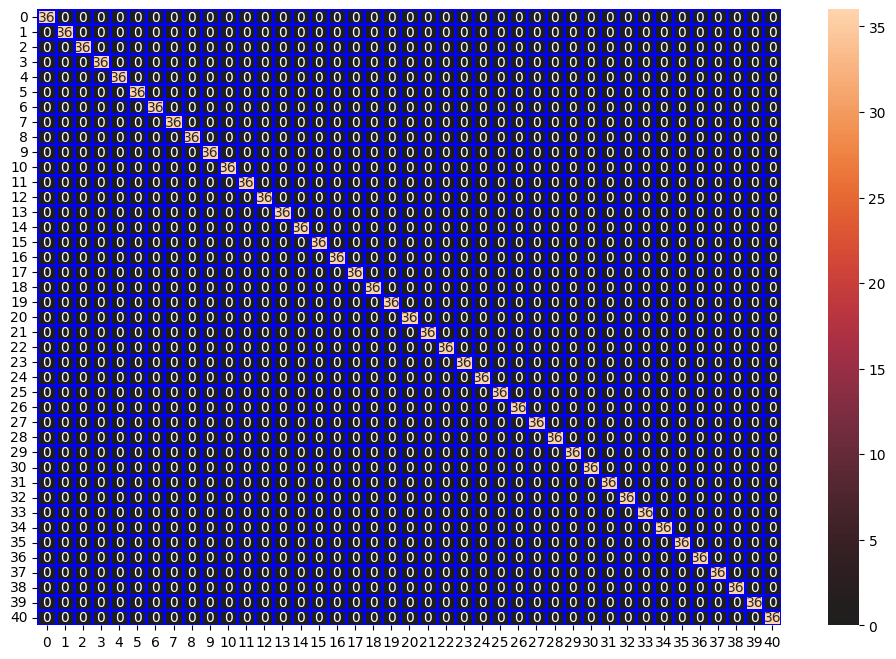




Modele name : RandomForestClassifier
Scaler name : QuantileTransformer
Accuracy_score: 100.0 %
Loss: 0.0 %
Cohen_kappa_score: 100.0 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        36
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        36
          11       1.00      1.00      1.00        36
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        36
          14       1.00     

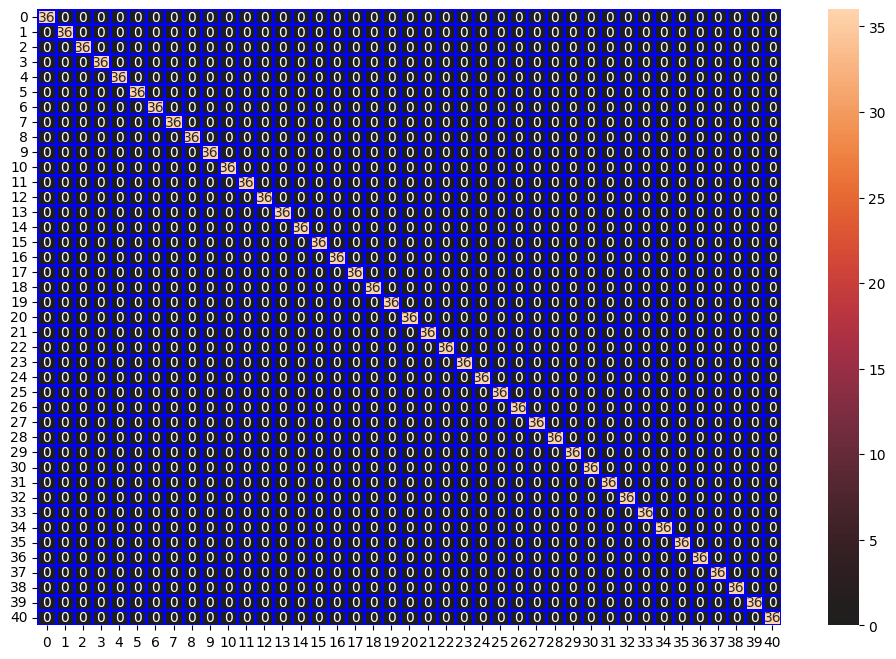




Modele name : RandomForestClassifier
Scaler name : PowerTransformer
Accuracy_score: 100.0 %
Loss: 0.0 %
Cohen_kappa_score: 100.0 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        36
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        36
          11       1.00      1.00      1.00        36
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        36
          14       1.00      1.

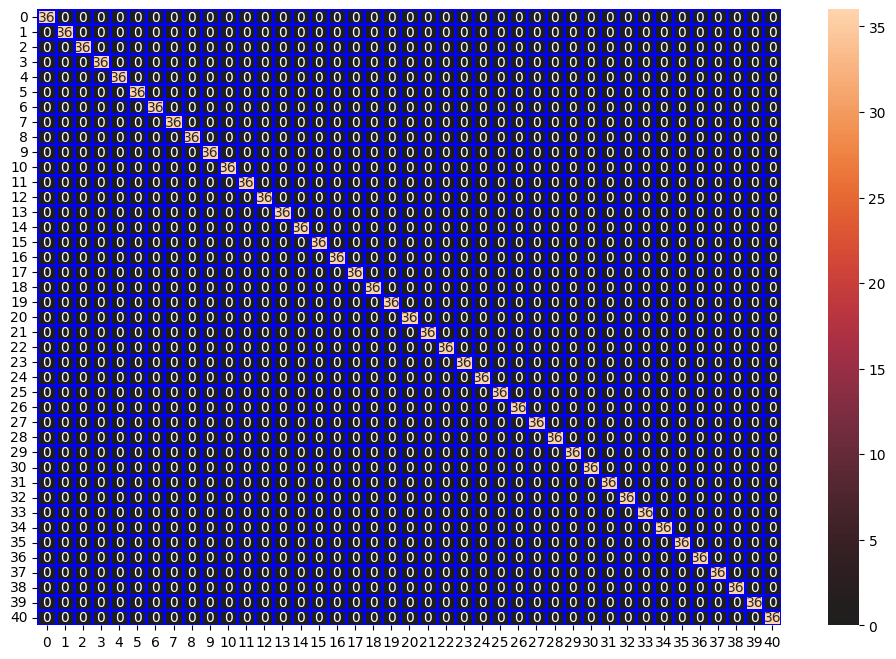




Modele name : RandomForestClassifier
Scaler name : Normalizer
Accuracy_score: 100.0 %
Loss: 0.0 %
Cohen_kappa_score: 100.0 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       1.00      1.00      1.00        36
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        36
          11       1.00      1.00      1.00        36
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        36
          14       1.00      1.00    

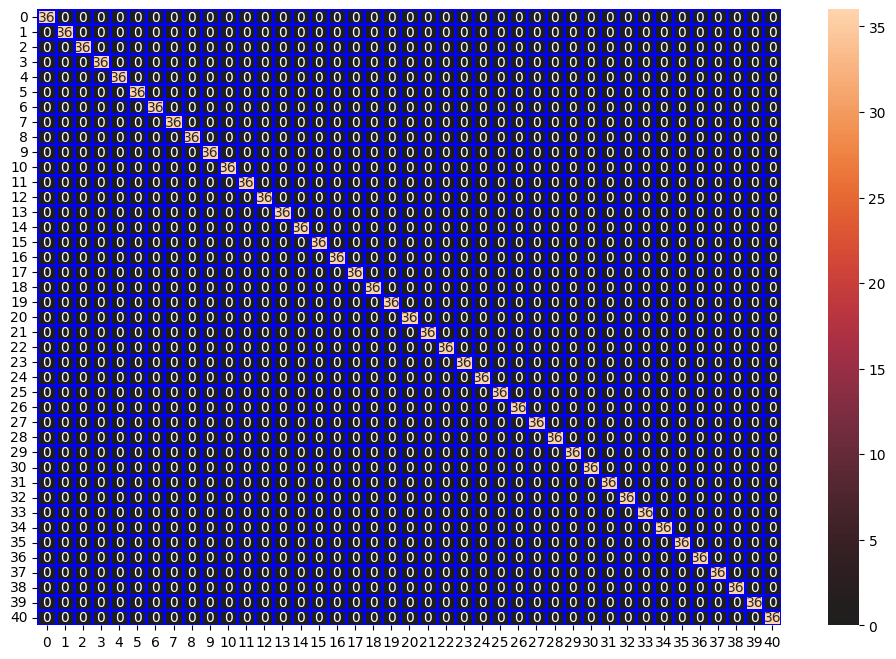




Done...


In [23]:
for model in model_list:
    for scaler in scaler_list:
        run_pipeline(X_train, X_test, y_train, y_test, scaler, model)
print("Done...")